# Comparing the mse of the LSTM, physical model and the boosted model

In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from itertools import product


In [13]:
ds_lstm = xr.open_dataset("../data/processed/mse_LSTM.nc")
ds_phys = xr.open_dataset("../data/processed/mse_physical_model.nc")
ds_boost = xr.open_dataset("../data/processed/mse_boosted_model.nc")
ds_lstm_d_range = xr.open_dataset("../data/processed/mse_LSTM_d-range.nc")
ds_lstm_h_range = xr.open_dataset("../data/processed/mse_LSTM_h-range.nc")
ds_boost_d_range = xr.open_dataset("../data/processed/mse_boosted_d-range.nc")
ds_boost_h_range = xr.open_dataset("../data/processed/mse_boosted_model_h-range.nc")

Align dimensions of datasets

In [14]:
ds_lstm, ds_phys, ds_boost = xr.align(
    ds_lstm, ds_phys, ds_boost, join="exact"
)

In [15]:
ds_lstm_d_range, ds_lstm_h_range, ds_boost_d_range, ds_boost_h_range = xr.align(
  ds_lstm_d_range, ds_lstm_h_range, ds_boost_d_range, ds_boost_h_range, join = "exact"
)

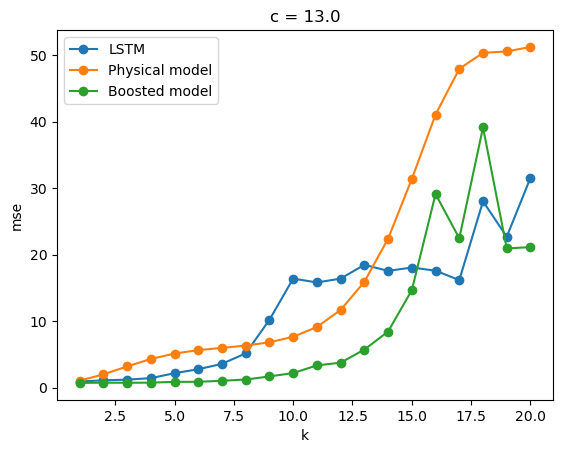

In [16]:
fig, ax = plt.subplots()


ds_lstm.mse.plot(marker="o", label="LSTM")
ds_phys.mse.sel(c=13).plot(marker="o",label="Physical model")
ds_boost.mse.sel(c=13).plot(marker="o",label="Boosted model")

ax.legend()

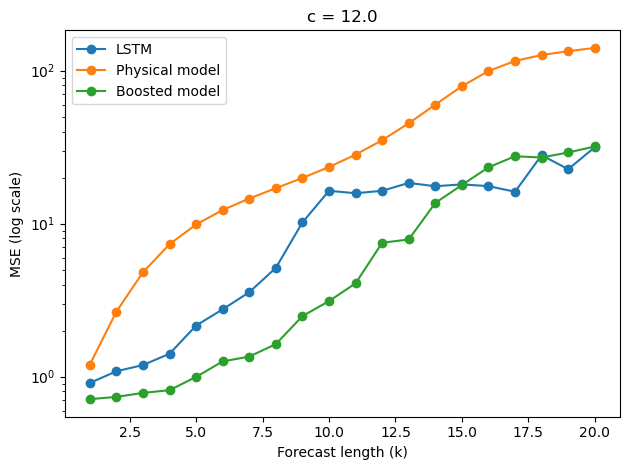

In [17]:
fig, ax = plt.subplots()
ax.set_yscale("log")
ds_lstm.mse.plot(ax=ax, marker="o", linestyle="-", label="LSTM")
ds_phys.mse.sel(c=12).plot(ax=ax, marker="o", linestyle="-", label="Physical model")
ds_boost.mse.sel(c=12).plot(ax=ax, marker="o", linestyle="-", label="Boosted model")

ax.set_ylabel("MSE (log scale)")
ax.set_xlabel("Forecast length (k)")
fig.tight_layout()


ax.legend()

In [42]:
from pathlib import Path

FIGURES = Path("../figures/boosting/base")
FIGURES.mkdir(parents=True, exist_ok=True)


In [43]:
for c in np.linspace(11,16,11):
    fig, ax = plt.subplots()

    ax.set_yscale("log")
    ds_lstm.mse.plot(ax=ax, marker="o", linestyle="-", label="LSTM")
    ds_phys.mse.sel(c=c).plot(ax=ax, marker="o", linestyle="-", label="Physical model")
    ds_boost.mse.sel(c=c).plot(ax=ax, marker="o", linestyle="-", label="Boosted model")

    ax.set_ylabel("MSE (log scale)")
    ax.set_xlabel("Forecast length (k)")
    fig.tight_layout()
    ax.legend()
    
    fig.savefig(FIGURES / f"mse_vs_k_c{c}.png", dpi=300, bbox_inches="tight")
    plt.close(fig)  # important!

# Plot figures comparing h-range 

In [18]:
c_range = np.linspace(11,16,11)
k_range = [5,10,15]
configs = list(product(k_range, c_range))


In [19]:
from pathlib import Path

FIGURES = Path("../figures/boosting/h-range")
FIGURES.mkdir(parents=True, exist_ok=True)

In [12]:
for k, c in configs:

  fig, ax = plt.subplots()
  # ax.set_yscale("log")
  ds_lstm_h_range.mse.sel(k=k).plot(ax=ax, marker="o", linestyle="-", label="LSTM")
  ds_boost_h_range.mse.sel(c=c, k=k).plot(ax=ax, marker="o", linestyle="-", label="Boosted Model")


  ax.set_ylabel("MSE")
  ax.set_xlabel("Hidden size")
  fig.tight_layout()
  ax.legend()

  fig.savefig(FIGURES / f"mse_vs_h_k{k}_c{c}.png", dpi=300, bbox_inches="tight")
  plt.close(fig)  
  

# Plot figures comparing data size


In [20]:
FIGURES = Path("../figures/boosting/d-range")
FIGURES.mkdir(parents=True, exist_ok=True)

In [21]:
for k, c in configs:

  fig, ax = plt.subplots()
  # ax.set_yscale("log")
  ds_lstm_d_range.mse.sel(k=k).plot(ax=ax, marker="o", linestyle="-", label="LSTM")
  ds_boost_d_range.mse.sel(c=c, k=k).plot(ax=ax, marker="o", linestyle="-", label="Boosted Model")


  ax.set_ylabel("MSE")
  ax.set_xlabel("Data size")
  fig.tight_layout()
  ax.legend()

  fig.savefig(FIGURES / f"mse_vs_d_k{k}_c{c}.png", dpi=300, bbox_inches="tight")
  plt.close(fig)  